In [ ]:
%pip install awswrangler pycaret[full]
%pip install xgboost

In [2]:
# import awswrangler as wr
import pandas as pd
import numpy as np
# import boto3
# from sagemaker import get_execution_role
import datetime
import string
import random
from pycaret.classification import *

In [3]:
data = pd.read_csv('data/data_feature_eng.csv')
# print(data)

In [4]:
m_setup = setup(data=data, target='label', normalize=True, 
                   feature_interaction=False, 
                   feature_ratio=False,
                   trigonometry_features=False,
                   use_gpu=True)

In [4]:
# max_depth = 트리 최대 깊이
# max_leaves = 트리 최대 리프
# subsample = row sampling
# colsample_bytree = column sampling 각 이터레이션에 사용되는 칼럼의 비율
# 일반적으로 row sampling 보다는 column sampling이 모형성능과 학습시간에 더 큰 영향을 준다
# xgboost = create_model('xgboost', max_depth=16, max_leaves=255)
# xgboost = create_model('xgboost')
xgboost = create_model('xgboost', max_depth=8, max_leaves=255)
# best_model = compare_models(n_select=6)

In [5]:
# max leaves -> 2**(n-1), n = max_depth
params    = {'max_depth': [128, 64, 32],
             'max_leaves': [256, 1024, 4096],              
             'colsample_bytree':[0.2, 0.4, 0.6, 0.8, 1.0],
             'learning_rate':[0.05, 0.005]
             }#range(14,17)}
# tuned_xgboost = tune_model(xgboost, optimize='F1', custom_grid=params)
tuned_xgboost = tune_model(xgboost, optimize='Accuracy', custom_grid=params, tuner_verbose=3)
# tuned_xgboost = tune_model(xgboost, optimize='Kappa')

In [6]:
tuned_xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=32, max_leaves=1024, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=6868, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='gpu_hist',
              use_label_encoder=True, validate_parameters=1, ...)

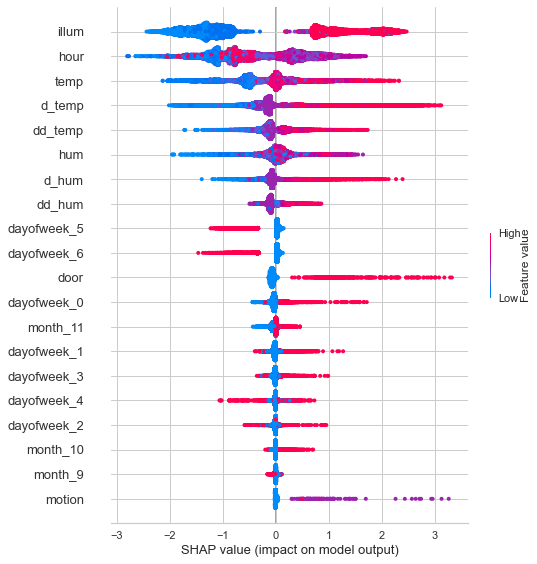

In [8]:
interpret_model(tuned_xgboost)

In [1]:
eda(tuned_xgboost)

NameError: name 'eda' is not defined

In [7]:
# plot_model(tuned_dt, plot='auc')
evaluate_model(tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…